In [1]:
import matplotlib.pyplot as plt
import os
from shutil import copyfile
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
import pyathena as pa
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator
import copy
from mpl_toolkits import axes_grid1


from matplotlib.colors import LogNorm
from six.moves import cPickle as pickle
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')  # r'No ICM',
#C = ('gray', 'mediumturquoise', 'dodgerblue','mediumblue' ,'goldenrod','salmon', 'firebrick','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C = ('k', 'powderblue', 'dodgerblue','mediumblue' ,'salmon', 'crimson','goldenrod')
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
crit = 94
k=1
z = range(895)
#plt.figure(figsize=(6,10))
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

(249L, 896L)
17063.554433912308
30019.68934046087
mean 444 442
461 453


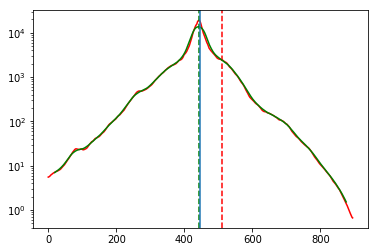

(249L, 896L)
20431.512649265922
18916.092508822385
mean 448 456
445 451


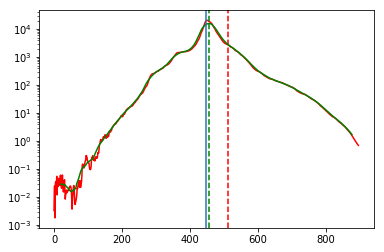

(249L, 896L)
32155.943065193296
28048.59357922709
mean 479 464
465 469


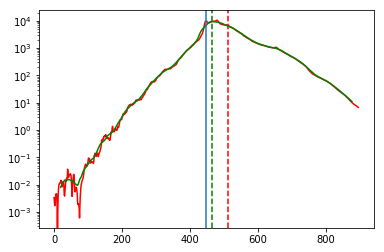

(249L, 1792L)
36219.30813887639
31669.46162881891
mean 895 928
953 933


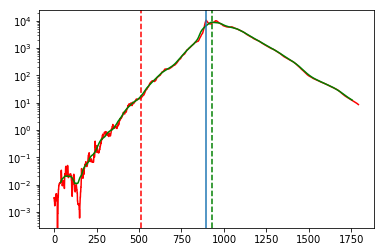

(249L, 896L)
22546.38055426407
14629.641889934559
mean 453 465
744 751


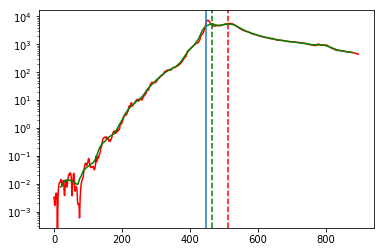

(223L, 1792L)
21991.30695047535
19303.592016437535
mean 902 1028
1652 1670


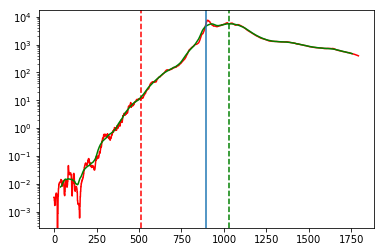

(223L, 896L)
15803.220988320263
379.8942718832725
mean 455 466
774 782


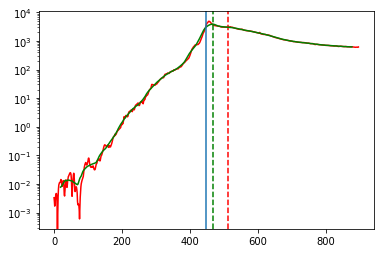

In [28]:
for j in (0,1,2,3,4,5,6):
    #plt.figure(figsize=(6,4))
    variable = 'density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    SFR = np.genfromtxt('./proj/SFR_%s.txt'% labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt'% labell[j])
    D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    #print D
    print D.shape
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
    #print D.shape
    #for t in range(50):
    #    plt.semilogy(P[t,:],c='k')
        #plt.axhline(np.max(Tot),ls='--')
    #    print np.max(P[t,:])
        #plt.ylim(1e2,1e5)
        #plt.show()
        #plt.close()
    #print P[crit::,:].shape
    P_e = P[0:crit,:]; P_l = P[crit::,:] # +icm_tot[0:crit,0:-1] +icm_tot[crit::,0:-1]
    SFR_e = SFR[0:crit]; SFR_l = SFR[crit::]
    W_e = W[0:crit,:]; W_l = W[crit::,:]
    D_e = D[0:crit, :]; D_l = D[crit::, :]


    P_medi_e = np.nanmean(P_e,axis=0); P_medi_l = np.nanmean(P_l,axis=0)
    P_min_e = np.nanpercentile(P_e,25,axis=0) ; P_max_e = np.nanpercentile(P_e,75,axis=0)
    P_min_l = np.nanpercentile(P_l,25,axis=0) ; P_max_l = np.nanpercentile(P_l,75,axis=0)

    SFR_medi_e = np.nanmean(SFR_e); SFR_medi_l = np.nanmean(SFR_l)
    SFR_min_e = np.nanpercentile(SFR_e,25) ; SFR_min_l = np.nanpercentile(SFR_l,25)
    SFR_max_e = np.nanpercentile(SFR_e, 75) ; SFR_max_l = np.nanpercentile(SFR_l,75)

    W_medi_e = np.nanmean(W_e,axis=0); W_medi_l = np.nanmean(W_l,axis=0)
    W_min_e = np.nanpercentile(W_e,25,axis=0) ; W_min_l = np.nanpercentile(W_l,25,axis=0)
    W_max_e = np.nanpercentile(W_e, 75, axis=0) ; W_max_l = np.nanpercentile(W_l,75,axis=0)
    print np.nanmax(W_e)
    print np.nanmax(W_l)
    D_medi_e = np.nanmean(D_e,axis=0)*1e6; D_medi_l = np.nanmean(D_l,axis=0)*1e6
    D_min_e = np.nanpercentile(D_e,25,axis=0) ; D_min_l = np.nanpercentile(D_l,25,axis=0)
    D_max_e = np.nanpercentile(D_e, 75, axis=0) ; D_max_l = np.nanpercentile(D_l,75,axis=0)
    
    if j==3 or j==5:
        l_b = 75 # box length corresponding to 300pc
        cen = 895
        z = range(1792)
    else:
        l_b = 38
        cen = 447
        z = range(896)
    #print D_medi_e,D_medi_e.shape
    box_max_e =[]
    box_max_l =[]
    for i in range(len(D_medi_e)-l_b):
        a = D_medi_e[i:i+l_b]
        b = D_medi_l[i:i+l_b]
        box_max_e.append(np.mean(a))
        box_max_l.append(np.mean(b))
        
    d_peak_e_ind = np.argmax(D_medi_e)
    box_peak_e_ind = np.argmax(box_max_e)+l_b/2
    
    d_peak_l_ind = np.argmax(D_medi_l)
    box_peak_l_ind = np.argmax(box_max_l)+l_b/2
    
    plt.semilogy(z,D_medi_e,'r')
    plt.axvline(d_peak_ind,c='r',ls='--')
    plt.semilogy(np.array(z[l_b::])-l_b/2,box_max_e,'g')
    plt.axvline(box_peak_e_ind,c='g',ls='--')
    plt.axvline(cen)
    print 'mean',d_peak_e_ind, box_peak_e_ind
    print d_peak_l_ind, box_peak_l_ind
    plt.show()

(249L, 896L)
17063.554433912308
30019.68934046087
median 441 447


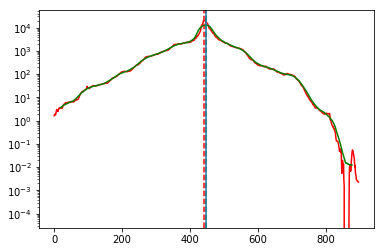

(249L, 896L)
20431.512649265922
18916.092508822385
median 451 454


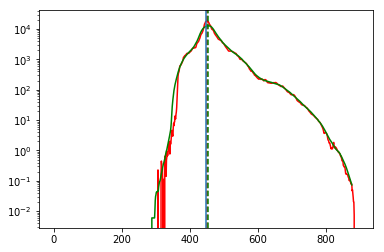

(249L, 896L)
32155.943065193296
28048.59357922709
median 479 473


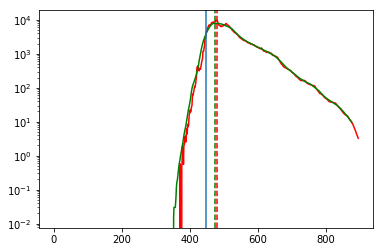

(249L, 1792L)
36219.30813887639
31669.46162881891
median 949 953


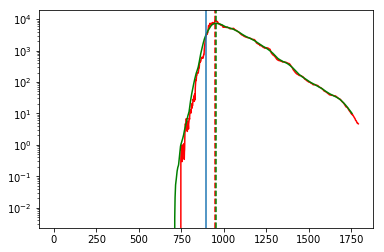

(249L, 896L)
22546.38055426407
14629.641889934559
median 526 513


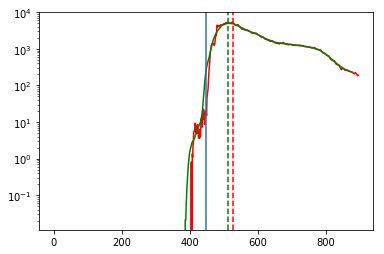

(223L, 1792L)
21991.30695047535
19303.592016437535
median 1013 1019


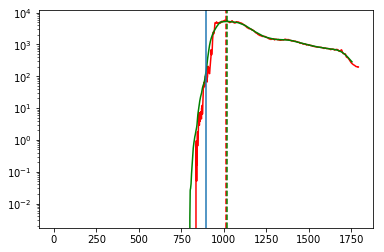

(223L, 896L)
15803.220988320263
379.8942718832725
median 512 526


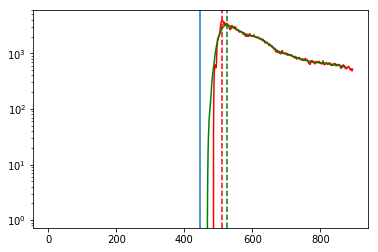

In [27]:
for j in (0,1,2,3,4,5,6):
    #plt.figure(figsize=(6,4))
    variable = 'density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    SFR = np.genfromtxt('./proj/SFR_%s.txt'% labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt'% labell[j])
    D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    #print D
    print D.shape
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
    #print D.shape
    #for t in range(50):
    #    plt.semilogy(P[t,:],c='k')
        #plt.axhline(np.max(Tot),ls='--')
    #    print np.max(P[t,:])
        #plt.ylim(1e2,1e5)
        #plt.show()
        #plt.close()
    #print P[crit::,:].shape
    P_e = P[0:crit,:]; P_l = P[crit::,:] # +icm_tot[0:crit,0:-1] +icm_tot[crit::,0:-1]
    SFR_e = SFR[0:crit]; SFR_l = SFR[crit::]
    W_e = W[0:crit,:]; W_l = W[crit::,:]
    D_e = D[0:crit, :]; D_l = D[crit::, :]


    P_medi_e = np.nanmean(P_e,axis=0); P_medi_l = np.nanmean(P_l,axis=0)
    P_min_e = np.nanpercentile(P_e,25,axis=0) ; P_max_e = np.nanpercentile(P_e,75,axis=0)
    P_min_l = np.nanpercentile(P_l,25,axis=0) ; P_max_l = np.nanpercentile(P_l,75,axis=0)

    SFR_medi_e = np.nanmean(SFR_e); SFR_medi_l = np.nanmean(SFR_l)
    SFR_min_e = np.nanpercentile(SFR_e,25) ; SFR_min_l = np.nanpercentile(SFR_l,25)
    SFR_max_e = np.nanpercentile(SFR_e, 75) ; SFR_max_l = np.nanpercentile(SFR_l,75)

    W_medi_e = np.nanmean(W_e,axis=0); W_medi_l = np.nanmean(W_l,axis=0)
    W_min_e = np.nanpercentile(W_e,25,axis=0) ; W_min_l = np.nanpercentile(W_l,25,axis=0)
    W_max_e = np.nanpercentile(W_e, 75, axis=0) ; W_max_l = np.nanpercentile(W_l,75,axis=0)
    print np.nanmax(W_e)
    print np.nanmax(W_l)
    D_medi_e = np.nanmedian(D_e,axis=0)*1e6; D_medi_l = np.nanmedian(D_l,axis=0)*1e6
    D_min_e = np.nanpercentile(D_e,25,axis=0) ; D_min_l = np.nanpercentile(D_l,25,axis=0)
    D_max_e = np.nanpercentile(D_e, 75, axis=0) ; D_max_l = np.nanpercentile(D_l,75,axis=0)
    
    if j==3 or j==5:
        l_b = 75 # box length corresponding to 300pc
        cen = 895
        z = range(1792)
    else:
        l_b = 38
        cen = 447
        z = range(896)
    #print D_medi_e,D_medi_e.shape
    box_max =[]
    for i in range(len(D_medi_e)-l_b):
        a = D_medi_e[i:i+l_b]
        box_max.append(np.mean(a))
    d_peak_ind = np.argmax(D_medi_e)
    box_peak_ind = np.argmax(box_max)+l_b/2
    
    plt.semilogy(z,D_medi_e,'r')
    plt.axvline(d_peak_ind,c='r',ls='--')
    plt.semilogy(np.array(z[l_b::])-l_b/2,box_max,'g')
    plt.axvline(box_peak_ind,c='g',ls='--')
    plt.axvline(cen)
    print 'median',d_peak_ind, box_peak_ind
    plt.show()

(249L, 896L)
17063.554433912308
30019.68934046087


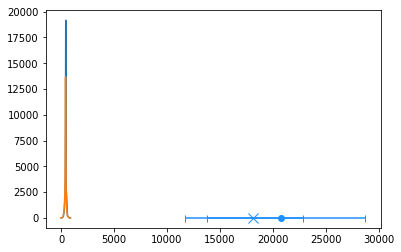

No ICM 436 451
(249L, 896L)


KeyboardInterrupt: 

In [12]:
for j in (0,1,2,3,4,5,6):
    #plt.figure(figsize=(6,4))
    variable = 'density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    SFR = np.genfromtxt('./proj/SFR_%s.txt'% labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt'% labell[j])
    D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    #print D
    print D.shape
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
    #print D.shape
    #for t in range(50):
    #    plt.semilogy(P[t,:],c='k')
        #plt.axhline(np.max(Tot),ls='--')
    #    print np.max(P[t,:])
        #plt.ylim(1e2,1e5)
        #plt.show()
        #plt.close()
    #print P[crit::,:].shape
    P_e = P[0:crit,:]; P_l = P[crit::,:] # +icm_tot[0:crit,0:-1] +icm_tot[crit::,0:-1]
    SFR_e = SFR[0:crit]; SFR_l = SFR[crit::]
    W_e = W[0:crit,:]; W_l = W[crit::,:]
    D_e = D[0:crit, :]; D_l = D[crit::, :]


    P_medi_e = np.nanmean(P_e,axis=0); P_medi_l = np.nanmean(P_l,axis=0)
    P_min_e = np.nanpercentile(P_e,25,axis=0) ; P_max_e = np.nanpercentile(P_e,75,axis=0)
    P_min_l = np.nanpercentile(P_l,25,axis=0) ; P_max_l = np.nanpercentile(P_l,75,axis=0)

    SFR_medi_e = np.nanmean(SFR_e); SFR_medi_l = np.nanmean(SFR_l)
    SFR_min_e = np.nanpercentile(SFR_e,25) ; SFR_min_l = np.nanpercentile(SFR_l,25)
    SFR_max_e = np.nanpercentile(SFR_e, 75) ; SFR_max_l = np.nanpercentile(SFR_l,75)

    W_medi_e = np.nanmean(W_e,axis=0); W_medi_l = np.nanmean(W_l,axis=0)
    W_min_e = np.nanpercentile(W_e,25,axis=0) ; W_min_l = np.nanpercentile(W_l,25,axis=0)
    W_max_e = np.nanpercentile(W_e, 75, axis=0) ; W_max_l = np.nanpercentile(W_l,75,axis=0)
    print np.nanmax(W_e)
    print np.nanmax(W_l)
    D_medi_e = np.nanmean(D_e,axis=0)*1e6; D_medi_l = np.nanmean(D_l,axis=0)*1e6
    D_min_e = np.nanpercentile(D_e,25,axis=0) ; D_min_l = np.nanpercentile(D_l,25,axis=0)
    D_max_e = np.nanpercentile(D_e, 75, axis=0) ; D_max_l = np.nanpercentile(D_l,75,axis=0)
    
    if j==3 or j==5:
        l_b = 75 # box length corresponding to 300pc
    else:
        l_b = 38
    #print D_medi_e,D_medi_e.shape
    box_max =[]
    for i in range(len(D_medi_e)-l_b):
        a = D_medi_e[i:i+l_b]
        box_max.append(np.mean(a))
    
    plt.plot(D_medi_e)
    plt.plot(box_max)
    plt.show()

    
    # ICM calculation below
    '''
    icmtot_e = icm_tot[0:crit, :]; icmtot_l = icm_tot[crit::, :]
    icmth_e = icm_th[0:crit, :]; icmth_l = icm_th[crit::, :]
    icmtu_e = icm_tu[0:crit, :]; icmtu_l = icm_tu[crit::, :]
    
    icmtot_medi_e = np.nanmean(icmtot_e,axis=0); icmtot_medi_l = np.nanmean(icmtot_l,axis=0)
    icmtot_min_e = np.nanpercentile(icmtot_e,25,axis=0) ; icmtot_min_l = np.nanpercentile(icmtot_l,25,axis=0)
    icmtot_max_e = np.nanpercentile(icmtot_e, 75, axis=0) ; icmtot_max_l = np.nanpercentile(icmtot_l,75,axis=0)

    icmth_medi_e = np.nanmean(icmth_e,axis=0); icmth_medi_l = np.nanmean(icmth_l,axis=0)
    icmth_min_e = np.nanpercentile(icmth_e,25,axis=0) ; icmth_min_l = np.nanpercentile(icmth_l,25,axis=0)
    icmth_max_e = np.nanpercentile(icmth_e, 75, axis=0) ; icmth_max_l = np.nanpercentile(icmth_l,75,axis=0)

    icmtu_medi_e = np.nanmean(icmtu_e,axis=0); icmtu_medi_l = np.nanmean(icmtu_l,axis=0)
    icmtu_min_e = np.nanpercentile(icmtu_e,25,axis=0) ; icmtu_min_l = np.nanpercentile(icmtu_l,25,axis=0)
    icmtu_max_e = np.nanpercentile(icmtu_e, 75, axis=0) ; icmtu_max_l = np.nanpercentile(icmtu_l,75,axis=0)
    '''

    #d_e_p = np.argmax(D_medi_e); d_l_p = np.argmax(D_medi_l) # Density profile peak position
    #d_e_p = np.argmax(W_medi_e); d_l_p = np.argmax(W_medi_l)  # Weight profile peak position
    d_e_p = np.argmax(P_medi_e); d_l_p = np.argmax(P_medi_l)  # Pressure profile peak position

    print labell[j], d_e_p, d_l_p
    #print P_medi_e.shape
    #print SFR_medi_e
    #print W_medi_e.shape
    #print D_medi_e.shape

    #print D_medi_e[0:-1]
    '''
    #plt.subplot(4,1,k)
    plt.plot(z,icmtot_medi_e[0:-1],'r-',label='P$_{ICM}$_%s' % labell[j])
    #plt.fill_between(z,P_min_e,P_max_e,facecolor=C[j],alpha=0.5)
    plt.plot(z,icmtot_medi_l[0:-1],'r--')
    #plt.fill_between(z,P_min_l,P_max_l,facecolor=C[j],alpha=0.5)

    plt.plot(z,icmth_medi_e[0:-1],c='coral',ls='-',label='P$_{ICM,ther}$_%s' % labell[j])
    #plt.fill_between(z,P_min_e,P_max_e,facecolor=C[j],alpha=0.5)
    plt.plot(z,icmth_medi_l[0:-1],c='coral',ls='--')
    #plt.fill_between(z,P_min_l,P_max_l,facecolor=C[j],alpha=0.5)

    plt.plot(z,icmtu_medi_e[0:-1],c='gold',ls='-',label='P$_{ICM,turb}$_%s' % labell[j])
    #plt.fill_between(z,P_min_e,P_max_e,facecolor=C[j],alpha=0.5)
    plt.plot(z,icmtu_medi_l[0:-1],c='gold',ls='--')
    #plt.fill_between(z,P_min_l,P_max_l,facecolor=C[j],alpha=0.5)

    plt.plot(z,W_medi_e,'c-',label='W$_{ISM}$_%s' % labell[j])
    #plt.fill_between(z,W_min_e,W_max_e,facecolor=C[j],alpha=0.5)
    plt.plot(z,W_medi_l,'c--')



    plt.plot([],[],label='Early',ls='-',c='k')
    plt.axhline(Model[j], ls='-.', c='k', label='Input ICM pressure')
    plt.plot([],[],label='Late',ls='--',c='k')


    h, l = plt.gca().get_legend_handles_labels()
    legend1 = plt.legend(h[:4], l[:4], loc='upper right')  # ,fontsize=14,framealpha=0.3)
    if k==1:
        plt.legend(h[4:], l[4:], loc='upper left',ncol=2 ,fontsize=11.5)
        plt.gca().add_artist(legend1)
    

    plt.fill_between(z,P_min_e,P_max_e,facecolor=C[j],alpha=0.5)
    plt.fill_between(z,P_min_l,P_max_l,facecolor=C[j],alpha=0.5)

    plt.plot(z, P_medi_e, c=C[j], ls='-', label='P_Early_%s' % labell[j])
    plt.plot(z, P_medi_l, c=C[j], ls='--', label='P_Late_%s' % labell[j])

    #plt.plot(z,W_medi_e,'m-',label='W_Early_%s' % labell[j])
    #plt.fill_between(z,W_min_e,W_max_e,facecolor=C[j],alpha=0.5)
    #plt.plot(z,W_medi_l,'m--',label='W_Late_%s' % labell[j])
    #print np.max(D_medi_e)
    #print D_medi_e[0:-1].shape
    #print len(z)
    #plt.plot(z,D_medi_e[:-1],'y-',label='D_Early_%s' % labell[j])
    #plt.fill_between(z,W_min_e,W_max_e,facecolor=C[j],alpha=0.5)
    #plt.plot(z,D_medi_l[:-1],'y--',label='D_Late_%s' % labell[j])

    #e= np.argmax(W_medi_e)
    #l = np.argmax(W_medi_l)
    #print e, l
    #plt.axvline(e,ls='-',c='r')
    #plt.axvline(l,ls='--',c='b')
    #plt.fill_between(z,W_min_l,W_max_l,facecolor=C[j],alpha=0.5)
    plt.yscale('log', nonposy='clip')
    plt.ylim(5e2, 1e5)
    plt.xlim(0, 896)
    plt.ylabel('Pressure [P/$k_b$]')
    #if k==4:
    plt.xticks([73, 198, 323, 448, 573, 698, 823], ['-3', '-2', '-1', '0', '1', '2', '3'])
    plt.xlabel('z [kpc]')
    #else:
    #    plt.xticks([73, 198, 323, 448, 573, 698, 823], [])
    plt.tick_params(which='both', direction='in')
    plt.legend(loc='upper right')

    k = k+1
    plt.tight_layout()
    #plt.savefig('D:/yeongu/plots/paperplot/new/%s-%s-zprof.png' % (labell[j],variable),dpi=300)
    #plt.savefig('D:/yeongu/plots/paperplot/new/WismPicm.eps',format='eps',dpi=300)
    plt.show()
    plt.close()
    '''

    #print np.argmax(W_medi_e)
    #print np.argmax(W_medi_l)
    #if j!=1:
    pe = P_medi_e[d_e_p]; pl = P_medi_l[d_l_p]
    we = W_medi_e[d_e_p]; wl = W_medi_l[d_l_p]
    #else:
    #    w_e_p = np.argmax(W_medi_e) ; w_l_p = np.argmax(W_medi_l)
    #    pe = P_medi_e[w_e_p] ; pl = P_medi_l[w_l_p]
    #    we = W_medi_e[w_e_p] ; wl = W_medi_l[w_l_p]

    SFR_e_errors = [SFR_medi_e - SFR_min_e, SFR_max_e - SFR_medi_e]  # [np.nonzero(SFR_e)] nonzero selection
    SFR_l_errors = [SFR_medi_l - SFR_min_l, SFR_max_l - SFR_medi_l]
    P_e_errors = [pe - P_min_e[d_e_p], P_max_e[d_e_p] - pe]
    P_l_errors = [pl - P_min_l[d_l_p], P_max_l[d_l_p] - pl]
    W_e_errors = [we - W_min_e[d_e_p], W_max_e[d_e_p] - we]
    W_l_errors = [wl - W_min_l[d_l_p], W_max_l[d_l_p] - wl]
    ############################# Plot ################################

    plt.errorbar(we, SFR_medi_e,  xerr=np.array([W_e_errors]).T, yerr=np.array([SFR_e_errors]).T,color='none',ecolor=C[j], marker='o', mfc=C[j],mec=C[j], capsize=3.5, label=labell[j])
    if j != 5 and j != 4 and j != 6:
        plt.errorbar(wl, SFR_medi_l, xerr=np.array([W_l_errors]).T, yerr=np.array([SFR_l_errors]).T, color='none',ecolor=C[j], marker='x', mfc='none', mec=C[j], capsize=3.5,ms=10)


    
    #plt.errorbar(we, pe,  xerr=np.array([W_e_errors]).T, yerr=np.array([P_e_errors]).T,color='none',ecolor=C[j], marker='o', mfc=C[j],mec=C[j], capsize=3.5, label=labell[j])
    #if j != 5 and j!=4 and j!=6:
    #    plt.errorbar(wl, pl,  xerr=np.array([W_l_errors]).T, yerr=np.array([P_l_errors]).T, color='none',ecolor=C[j], marker='x', mfc='none', mec=C[j], capsize=3.5,ms=10)


##### legend #####
s1 = plt.scatter([], [], marker='o',edgecolors='k',facecolors='k',label='Early')
s2 = plt.scatter([], [], marker='x',edgecolors='k',facecolors='k',label='Late')
##################

##### legend modify #####
plt.rcParams['legend.numpoints']=1
h, l =plt.gca().get_legend_handles_labels()
legend1=plt.legend(h[2:],l[2:],loc='lower right',fontsize=10)#,framealpha=0.3)
plt.legend(h[:2],l[:2],loc='center right',fontsize=10)
plt.rcParams['legend.numpoints']=1
plt.gca().add_artist(legend1)
#########################

pressure=np.arange(1e2,7e5)

############ Pressure reference
#sfr_l1 = 2.1*1e-3*(pressure/1e4)**1.18
#plt.plot((pressure),(sfr_l1),ls='--',c='k')

############ Weight reference
sfr_l2 = 1.8*1e-3*(pressure/1e4)**1.13
plt.plot((pressure),(sfr_l2),ls='--',c='k')
##############################

############# 1 to 1 correlation
#y = pressure
#plt.plot(pressure,y,'k--')
##################################

plt.xscale('log', nonposx='clip')
plt.yscale('log', nonposy='clip')
plt.xlim(1e3,1e5)
#plt.ylim(1e3,1e5) # W vs P
plt.ylim(10**(-4),10**(-2))

plt.ylabel('log($\Sigma$$_{SFR}$) [M$_\odot$ yr$^{-1}$ kpc$^{-2}$]', fontsize=14)
#plt.xlabel('log(P/k$_b$) [K cm$^{-3}$]', fontsize=14)
plt.xlabel(r'log(W) [K cm$^{-3}$]', fontsize=14)

#plt.ylabel('log(P/k$_B$) [K cm$^{-3}$]', fontsize=14) # W vs P
#plt.ylabel(r'log(W) [K cm$^{-3}$]', fontsize=14) # W vs P
#plt.title('Density peak, mean')
plt.tight_layout()

#plt.savefig('D:/yeongu/plots/paperplot/new/W-SFR_new.png',dpi=400)
#plt.savefig('D:/yeongu/plots/paperplot/new/W-SRF_new.eps',format='eps',dpi=400)
#plt.savefig('W-SFR_new.png',dpi=400)
#plt.savefig('W-SRF_new.eps',format='eps',dpi=400)
plt.show()

In [180]:
P_tot=[]
W_tot=[]
D_tot=[]
ICM_tot=[]
for j in (0,1,2,3,4,5,6):
    #plt.figure(figsize=(6, 8))
    if j==3 or j==5:
        z=range(1791)
    else:
        z = range(895)
    variable = 'Density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt' % labell[j])
    Dc = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    Dh = np.genfromtxt('./proj/Dh_%s.txt' % labell[j])
    Dism = Dc+Dh
    print P.shape
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        ICM_tot.append(icm_tot)
        #print len(ICM_tot)
    P_tot.append(P)
    W_tot.append(W)
    D_tot.append(Dism)
    
    print j

P_tot = np.array(P_tot)
W_tot = np.array(W_tot)
D_tot = np.array(D_tot)
if j!=0:
    ICM_tot = np.array(ICM_tot)

(249L, 895L)
0
(249L, 895L)
1
(249L, 895L)
2
(249L, 1791L)
3
(249L, 895L)
4
(223L, 1791L)
5
(223L, 895L)
6


In [184]:
print ICM_tot[2].shape

(249L, 1792L)


In [205]:


#print ax
for k in range(249):
    fig, ax = plt.subplots(7, 1,figsize=(6,18))
    for j in range(7):

        if j==3 or j==5:
            z = range(1791)
        else:
            z = range(895)
        #print P_j
        #print j
        ax[j].semilogy(z, P_tot[j][k,:], c='c', ls='-', label='P_%s' % labell[j])
        ax[j].plot(z, W_tot[j][k,:],'m-',label='W_%s' % labell[j])
        ax[j].plot(z, D_tot[j][k,0:-1]*1e5,'y-',label='D_%s' % labell[j])
        if j!=0:
            ax[j].plot(z, ICM_tot[j-1][k,0:-1],'k-',label='ICM_%s' % labell[j])
        #plt.plot(z, P_medi_l, c='c', ls='--', label='P_Late_%s' % labell[j])
        #plt.fill_between(z,P_min_e,P_max_e,facecolor='c',alpha=0.3)
        #plt.fill_between(z,P_min_l,P_max_l,facecolor='c',alpha=0.3)
        #print 'Pressure',np.max(P_medi_e), np.max(P_medi_l)

        #plt.plot(z,W_medi_e,'m-',label='W_Early_%s' % labell[j])
        #plt.plot(z,W_medi_l,'m--',label='W_Late_%s' % labell[j])
        #plt.fill_between(z,W_min_e,W_max_e,facecolor='m',alpha=0.3)
        #plt.fill_between(z,W_min_l,W_max_l,facecolor='m',alpha=0.3)
        #print 'Weight',np.max(W_medi_e), np.max(W_medi_l)

        #plt.plot(z,D_medi_e[:-1]*1e,'y-',label='D_Early_%s' % labell[j])
        #plt.plot(z,D_medi_l[:-1]*1e5,'y--',label='D_Late_%s' % labell[j])
        if j==3 or j==5:
            ax[j].set_xlim(0,1791)
            ax[j].set_xticks([73*2, 198*2, 323*2, 448*2, 573*2, 698*2, 823*2])
            ax[j].set_xticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])
        else:
            ax[j].set_xlim(0,895)
            ax[j].set_xticks([73, 198, 323, 448, 573, 698, 823])
            ax[j].set_xticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])
        if j==6:
            ax[j].set_xlabel('z [kpc]')
            ax[j].legend(loc='upper right')
        ax[j].set_ylim(1e2,1e5)
        #plt.yscale('log')
    plt.tight_layout()
    plt.savefig('D:/yeongu/plots/profile_movie/profile_time_%s.png' % k)
    print k
    #plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13


C:\anaconda2\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158


C:\anaconda2\lib\site-packages\matplotlib\ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222


IndexError: index 223 is out of bounds for axis 0 with size 223

In [87]:

labell = ('No ICM', 'P1', 'P3', 'P3h', 'P7', 'P7h', 'P14')  # r'No ICM',
# C = ('gray', 'mediumturquoise', 'dodgerblue','mediumblue' ,'goldenrod','salmon', 'firebrick','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C = ('gray', 'lightskyblue', 'dodgerblue', 'mediumblue', 'goldenrod', 'salmon', 'firebrick')
Model = [0, 8.63 * 1e3, 3.46 * 1e4, 3.46 * 1e4, 6.92 * 1e4, 6.92 * 1e4, 1.38 * 1e5]
crit = 94
k = 1

plt.figure(figsize=(6,16))

for j in (0,1,2,3,4,5,6):
    #plt.figure(figsize=(6, 8))
    if j==3 or j==5:
        z=range(1791)
    else:
        z = range(895)
    variable = 'Density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    SFR = np.genfromtxt('./proj/SFR_%s.txt' % labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt' % labell[j])
    Wext = np.genfromtxt('./proj/WExt_%s.txt' % labell[j])
    Wsg = np.genfromtxt('./proj/WSg_%s.txt' % labell[j])
    # Density is calculated by np.mean(d*unit['density']) twice which is corresponding to np.sum(np.sum(d))/Area (Area=1024*1024/8/8)
    # Unit: solar mass per cubic parsec
    Dc = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    Dh = np.genfromtxt('./proj/Dh_%s.txt' % labell[j])
    #Dc=[]
    #Dh=[]
    Dism = Dc+Dh
    
    #globals()['P_%s' % j] = P
    globals()['W_%s' % j] = W
    #globals()['Dism_%s' % j] = Dism


    # print P[crit::,:].shape
    P_e = P[0:crit, :]; P_l = P[crit::, :]
    SFR_e = SFR[0:crit]; SFR_l = SFR[crit::]
    W_e = W[0:crit, :]; W_l = W[crit::, :]
    D_e = Dc[0:crit, :]; D_l = Dc[crit::, :]
    #D_e=[]; D_l=[]
    low= 10; high = 90
    if j!=0:
        #Dicm = np.genfromtxt('./proj/Dicm_%s.txt' % labell[j])

        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
        # print D.shape
        P_tot = P+icm_tot[:,0:-1]
        #D_icm_e = Dicm[0:crit, :]; D_icm_l = Dicm[crit::,:]
        icmtot_e = icm_tot[0:crit, :]; icmtot_l = icm_tot[crit::, :]
        icmth_e = icm_th[0:crit, :]; icmth_l = icm_th[crit::, :]
        icmtu_e = icm_tu[0:crit, :]; icmtu_l = icm_tu[crit::, :]

        #### ICM properties ####
        #Dicm_medi_e = np.nanmedian(D_icm_e, axis=0) ; Dicm_medi_l = np.nanmedian(D_icm_l, axis=0)
        #Dicm_min_e = np.nanpercentile(D_icm_e, low, axis=0); Dicm_min_l = np.nanpercentile(D_icm_l, low, axis=0)
        #Dicm_max_e = np.nanpercentile(D_icm_e, high, axis=0); Dicm_max_l = np.nanpercentile(D_icm_l, high, axis=0)
        globals()['icm_tot_%s' % j] = icm_tot
        icmtot_medi_e = np.nanmedian(icmtot_e,axis=0); icmtot_medi_l = np.nanmedian(icmtot_l,axis=0)
        icmtot_min_e = np.nanpercentile(icmtot_e,low,axis=0) ; icmtot_min_l = np.nanpercentile(icmtot_l,low,axis=0)
        icmtot_max_e = np.nanpercentile(icmtot_e, high, axis=0) ; icmtot_max_l = np.nanpercentile(icmtot_l,high,axis=0)
    print j
        
'''
    #### ISM properties #####
    P_medi_e = np.nanmedian(P_e, axis=0); P_medi_l = np.nanmedian(P_l, axis=0)
    P_min_e = np.nanpercentile(P_e, low, axis=0); P_min_l = np.nanpercentile(P_l, low, axis=0)
    P_max_e = np.nanpercentile(P_e, high,axis=0); P_max_l = np.nanpercentile(P_l, high, axis=0)

    W_medi_e = np.nanmedian(W_e, axis=0); W_medi_l = np.nanmedian(W_l, axis=0)
    W_min_e = np.nanpercentile(W_e, low, axis=0); W_min_l = np.nanpercentile(W_l, low, axis=0)
    W_max_e = np.nanpercentile(W_e, high,axis=0); W_max_l = np.nanpercentile(W_l, high, axis=0)
    W_ext = np.nanmedian(Wext, axis=0) ; W_sg = np.nanmedian(Wsg, axis=0) ;

    D_medi_e = np.nanmedian(D_e, axis=0) ; D_medi_l = np.nanmedian(D_l, axis=0)
    D_min_e = np.nanpercentile(D_e, low, axis=0); D_min_l = np.nanpercentile(D_l, low, axis=0)
    D_max_e = np.nanpercentile(D_e, high,axis=0); D_max_l = np.nanpercentile(D_l, high, axis=0)

    plt.subplot(7,1,k)

    #plt.plot(z, (W_medi_e+W_medi_l)/2., 'm-', label='W_all_%s' % labell[j])
    #plt.plot(z, W_ext, 'r-', label='W_ext_%s' % labell[j])
    #plt.plot(z, W_sg, 'b-', label='W_sg_%s' % labell[j])

    plt.plot(z, P_medi_e, c='c', ls='-', label='P_Early_%s' % labell[j])
    plt.plot(z, P_medi_l, c='c', ls='--', label='P_Late_%s' % labell[j])
    #plt.fill_between(z,P_min_e,P_max_e,facecolor='c',alpha=0.3)
    #plt.fill_between(z,P_min_l,P_max_l,facecolor='c',alpha=0.3)
    #print 'Pressure',np.max(P_medi_e), np.max(P_medi_l)

    plt.plot(z,W_medi_e,'m-',label='W_Early_%s' % labell[j])
    plt.plot(z,W_medi_l,'m--',label='W_Late_%s' % labell[j])
    #plt.fill_between(z,W_min_e,W_max_e,facecolor='m',alpha=0.3)
    #plt.fill_between(z,W_min_l,W_max_l,facecolor='m',alpha=0.3)
    #print 'Weight',np.max(W_medi_e), np.max(W_medi_l)

    plt.plot(z,D_medi_e[:-1]*1e5,'y-',label='D_Early_%s' % labell[j])
    plt.plot(z,D_medi_l[:-1]*1e5,'y--',label='D_Late_%s' % labell[j])
    #plt.fill_between(z,D_min_e[:-1]*1e5,D_max_e[:-1]*1e5,facecolor='y',alpha=0.3)
    #plt.fill_between(z,D_min_l[:-1]*1e5,D_max_l[:-1]*1e5,facecolor='y',alpha=0.3)
    if j!=0:
        plt.plot(z,icmtot_medi_e[0:-1],'k-',label='I_Early_%s' % labell[j])
        plt.plot(z,icmtot_medi_l[0:-1],'k--',label='I_Late_%s' % labell[j])

    plt.ylim(1e2,1e5)
    if j==3 or j==5:
        plt.xlim(0, 1791)
        plt.xticks([73*2, 198*2, 323*2, 448*2, 573*2, 698*2, 823*2], ['-3', '-2', '-1', '0', '1', '2', '3'])
    else:
        plt.xlim(0,895)
        plt.xticks([73, 198, 323, 448, 573, 698, 823], ['-3', '-2', '-1', '0', '1', '2', '3'])

    plt.yscale('log')
    plt.legend(loc='lower left')
    print j
    k = k+1
    if j==0:
        plt.title('median')
plt.xlabel('z [kpc]')
plt.tight_layout()
#plt.savefig('D:/yeongu/plots/paperplot/new/Allprof_new2.png', dpi=300)
plt.show()
'''

0
1
2
3
4
5
6


"\n    #### ISM properties #####\n    P_medi_e = np.nanmedian(P_e, axis=0); P_medi_l = np.nanmedian(P_l, axis=0)\n    P_min_e = np.nanpercentile(P_e, low, axis=0); P_min_l = np.nanpercentile(P_l, low, axis=0)\n    P_max_e = np.nanpercentile(P_e, high,axis=0); P_max_l = np.nanpercentile(P_l, high, axis=0)\n\n    W_medi_e = np.nanmedian(W_e, axis=0); W_medi_l = np.nanmedian(W_l, axis=0)\n    W_min_e = np.nanpercentile(W_e, low, axis=0); W_min_l = np.nanpercentile(W_l, low, axis=0)\n    W_max_e = np.nanpercentile(W_e, high,axis=0); W_max_l = np.nanpercentile(W_l, high, axis=0)\n    W_ext = np.nanmedian(Wext, axis=0) ; W_sg = np.nanmedian(Wsg, axis=0) ;\n\n    D_medi_e = np.nanmedian(D_e, axis=0) ; D_medi_l = np.nanmedian(D_l, axis=0)\n    D_min_e = np.nanpercentile(D_e, low, axis=0); D_min_l = np.nanpercentile(D_l, low, axis=0)\n    D_max_e = np.nanpercentile(D_e, high,axis=0); D_max_l = np.nanpercentile(D_l, high, axis=0)\n\n    plt.subplot(7,1,k)\n\n    #plt.plot(z, (W_medi_e+W_medi_l)/

In [131]:
print W_0

[[9.78065270e+03 9.78065273e+03 9.78065276e+03 ... 5.96771902e-01
  3.88292335e-01 1.92014411e-01]
 [9.57381407e+03 9.57381411e+03 9.57381420e+03 ... 6.95741586e-01
  4.50680492e-01 2.17346592e-01]
 [9.25064951e+03 9.25064992e+03 9.25065036e+03 ... 7.14325198e-01
  4.72240769e-01 2.33891768e-01]
 ...
 [1.47190764e+04 1.47190766e+04 1.47190768e+04 ... 1.37933965e-01
  9.21073936e-02 4.62984149e-02]
 [1.38234747e+04 1.38234748e+04 1.38234749e+04 ... 1.42555166e-01
  9.45512309e-02 4.76313036e-02]
 [1.29385459e+04 1.29385460e+04 1.29385460e+04 ... 1.55211713e-01
  1.03487360e-01 5.26066694e-02]]


In [148]:
for j in range(6):
    print j,P_j[0,:].shape

0 (895L,)
1 (895L,)
2 (895L,)
3 (895L,)
4 (895L,)
5 (895L,)


0


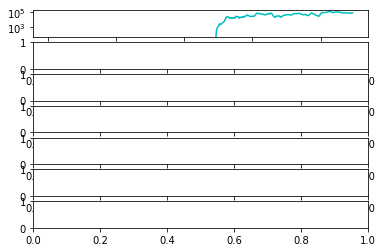

1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3


KeyboardInterrupt: 

In [147]:

fig, ax = plt.subplots(7, 1)
#print ax
for k in range(249):
    for j in range(7):

        if j==3 and j==5:
            z = range(1791)
        else:
            z = range(895)
        #print P_j
        print j
        ax[j].semilogy(z, P_j[k+50,:], c='c', ls='-', label='P_Early_%s' % labell[j])
        #ax[j].plot(z, W_j[k,:],'m-',label='W_Early_%s' % labell[j])
        #ax[j].plot(z, D_j[k,:]*1e5,'y-',label='D_Early_%s' % labell[j])
        #ax[j].plot(z, icm_tot_j[k,0:-1]*1e5,'y-',label='D_Early_%s' % labell[j])
        #plt.plot(z, P_medi_l, c='c', ls='--', label='P_Late_%s' % labell[j])
        #plt.fill_between(z,P_min_e,P_max_e,facecolor='c',alpha=0.3)
        #plt.fill_between(z,P_min_l,P_max_l,facecolor='c',alpha=0.3)
        #print 'Pressure',np.max(P_medi_e), np.max(P_medi_l)

        #plt.plot(z,W_medi_e,'m-',label='W_Early_%s' % labell[j])
        #plt.plot(z,W_medi_l,'m--',label='W_Late_%s' % labell[j])
        #plt.fill_between(z,W_min_e,W_max_e,facecolor='m',alpha=0.3)
        #plt.fill_between(z,W_min_l,W_max_l,facecolor='m',alpha=0.3)
        #print 'Weight',np.max(W_medi_e), np.max(W_medi_l)

        #plt.plot(z,D_medi_e[:-1]*1e,'y-',label='D_Early_%s' % labell[j])
        #plt.plot(z,D_medi_l[:-1]*1e5,'y--',label='D_Late_%s' % labell[j])
        #plt.yscale('log')
    plt.show()

In [105]:
print j

3


In [ ]:
simid_t = ('RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc')
#labell = ('No ICM','Very Weak' ,'Weak', 'Strong', 'Very Strong','ICM1', 'ICM2', 'ICM3', 'ICM4') #'NonICM',
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14' ,'ICM1', 'ICM2', 'ICM3', 'ICM4')  # r'No ICM',
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
Modell = [r'8.63*1e3',r'$3.46x10^4$',r'$6.92x10^4$',r'1.38*1e5']
S = ('-.','--','-')
C = ('k', 'salmon', 'mediumblue','deepskyblue' ,'darkgreen','lime', 'magenta','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
# overplot Starformation rate of three different simulations

Myr = unit['time'].to('Myr').value
Msun = unit['mass'].to('Msun').value
agebin = 10
crit = 3
coolftn = pa.coolftn()
s_cut = 0.5

for j in (0,3,5) :
    basedir = 'G:/yeongu/'
    if  j==5 or j==6 :
        stop = 473
    else:
        stop = 499

    simid = simid_t[j]
    Mom_up = []
    P=[]
    Weight = []
    SFR=[]
    Sg = []
    Ext = []
    D_c = []
    D_h = []
    D_icm = []
    Tot_icm = []
    Icm_turb = []
    Icm_ther = []
    ism_turb = []
    ism_ther = []
    ism_mag = []

    for tidx in range(250, stop):  # time step 251, 331, 411, 501
        #plt.figure(figsize=(6, 5))
        vtkfname = '%s%s/id0/%s.%04d.vtk' % (basedir, simid, simid, tidx)
        # read in domain information
        ds = pa.AthenaDataSet(vtkfname)

        #print(ds.field_list)

        #print(ds.derived_field_list)
        '''
        ########################## star formation rate #######################################
        starfname = vtkfname.replace('id0', 'starpar').replace('vtk', 'starpar.vtk')
        sp = pa.read_starvtk(starfname)

        star_clu = sp[sp['mass'] != 0]  # choose cluster, if choose 'mass' = 0, it means runaway star

In [212]:
a = (442, 453,456 ,451,464 ,469,465 ,751,466 ,782)
b = (928 ,933,1028, 1670)
a = np.array(a)
b = np.array(b)

In [214]:
print (a-448)*0.008
print (b-896)*0.004

[-0.048  0.04   0.064  0.024  0.128  0.168  0.136  2.424  0.144  2.672]
[0.128 0.148 0.528 3.096]
